# COUNTERING ONLINE HATE SPEECH

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive

/content/gdrive


In [3]:
cd MyDrive

/content/gdrive/MyDrive


In [4]:
cd Colab datasets

/content/gdrive/MyDrive/Colab datasets


In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mplot

In [6]:
rawData = pd.read_csv("Counterspeech.csv")
rawData.head()

,Category,CounterSpeech,commentText,date,hasReplies,id,likes,numberOfReplies,timestamp,user,Community,replies
0,Default,False,she is one of the last brave white women with ...,5 years ago,0.0,Ugw-_mfnTo9SUniGGTN4AaABAg,0,0.0,2012-12-05 09:13:58.535,Ik hou van surfen,jews,[]
1,Default,False,AMEN PASTOR!!!!!!!!,2 years ago,0.0,UgiMOgO3u4akkngCoAEC,0,0.0,2015-12-05 04:47:36.420,julius smith,lgbt,[]
2,"2,8",True,What kind of God is it that Hates people & Cur...,4 years ago,0.0,UgzemCMbg-ri1ri7sCt4AaABAg,0,0.0,2013-12-05 09:16:05.293,gary wersley,jews,[]
3,8,True,Question - Which comment is racist and why?\n ...,3 years ago,0.0,UghFhzrURF1svHgCoAEC,0,0.0,2015-01-05 16:27:25.589,Les Ordway,jews,[]
4,8,True,That Israel fail that is nothing new. That Isr...,5 years ago,0.0,Ugzr50sQdH0Ictuex214AaABAg,0,0.0,2012-12-05 09:17:14.596,HamalachMichael,jews,[]


In [24]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16156 entries, 0 to 16155
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         16156 non-null  object 
 1   CounterSpeech    16156 non-null  bool   
 2   commentText      16154 non-null  object 
 3   date             16156 non-null  object 
 4   hasReplies       16121 non-null  float64
 5   id               16156 non-null  object 
 6   likes            16156 non-null  int64  
 7   numberOfReplies  16121 non-null  float64
 8   timestamp        16156 non-null  object 
 9   user             16156 non-null  object 
 10  Community        16156 non-null  object 
 11  replies          16156 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 1.4+ MB


In [7]:
rawData.columns

Index(['Category', 'CounterSpeech', 'commentText', 'date', 'hasReplies', 'id',
       'likes', 'numberOfReplies', 'timestamp', 'user', 'Community',
       'replies'],
      dtype='object')

In [8]:
# A counter speech may have contents which belong to two or more categories of counterspeech
# For analysis purpose, we need to consider a particular content as in two or more category to know the picture more clearly.
# Hence, we will split the row into two or more depending on the number of categories it belong to.

#Storing the oringinal as it is.
RawData = rawData

#splitting
def splitDataFrameList(df,target_column,separator):
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

rawData=splitDataFrameList(rawData,'Category',',')
rawData.loc[rawData['Category']=='Default',['Category']]=0

`Attribues in the Dataset`
---
* **Community**             -->  The community which was targetted in the YouTube Video
* **CounterSpeech**        -->  This field indicates if the comment is a counterspeech or not.
* **Category**              -->  The type of counterspeech used in the comment text. The possible values are :
  - 0:  *default / Non-counter speech*
  - 1:  *Presentation of fact*
  - 2:  *Pointing out hypocrisy or contradiction*
  - 3:  *Warning of offline or online consequences*
  - 4:  *Affiliation*
  - 5:  *Denouncing hateful or dangerous speech*
  - 7:  *Humor*
  - 8:  *Positive Tone*
  - 9:  *Hostile Language*
* **commentText**           -->  The comment tagged by the annotator.
* **hasReplies**            -->  A boolean field indicating if the comments has received any replies or not.
* **id**                   -->  The unique id assigned to each comment.
* **likes**                 -->  The number of likes received by the comment.
* **numberOfReplies**      -->  The number of replies received by the comment.
* **replies**               -->  The list of replies received by the comment.
* **timestamp**             -->  The timestamp of the comment
* **user**                  -->  The account name of the user who posted the comment.





In [9]:
#The number of rows and columns in Dataset
rawData.shape

(16156, 12)

**Statistical Analysis of Dataset :**

In [10]:
rawData["Community"].value_counts()

lgbt     5692
jews     5645
black    4819
Name: Community, dtype: int64

In [11]:
rawData["CounterSpeech"].value_counts()

True     9130
False    7026
Name: CounterSpeech, dtype: int64

In [12]:
rawData["Category"].value_counts()

0     7026
9     2741
5     1331
7     1100
2     1038
8      864
1      752
3      728
4      565
10      11
Name: Category, dtype: int64

In [13]:
rawData.max(numeric_only=True)

CounterSpeech         1.0
hasReplies            1.0
likes              1114.0
numberOfReplies     500.0
dtype: float64

In [14]:
rawData.min(numeric_only=True)

CounterSpeech      0.0
hasReplies         0.0
likes              0.0
numberOfReplies    0.0
dtype: float64

In [15]:
rawData.mode(axis=0, numeric_only=True)

,CounterSpeech,hasReplies,likes,numberOfReplies
0,True,0.0,0,0.0


In [16]:
#Deviding the dataset on the basis of the community they belong to

rawData_jews = rawData[rawData['Community'] == 'jews']
rawData_black = rawData[rawData['Community'] == 'black']
rawData_lgbt = rawData[rawData['Community'] == 'lgbt']
print(rawData_jews)
print(rawData_black)
print(rawData_lgbt)

      Category  CounterSpeech  ... Community replies
0            0          False  ...      jews      []
2            2           True  ...      jews      []
3            8           True  ...      jews      []
4            8           True  ...      jews      []
5            8           True  ...      jews      []
...        ...            ...  ...       ...     ...
11653        8           True  ...      jews      []
11654        1           True  ...      jews      []
11655        4           True  ...      jews      []
11656        0          False  ...      jews      []
11657        1           True  ...      jews      []

[5645 rows x 12 columns]
      Category  CounterSpeech  ... Community replies
9            0          False  ...     black      []
10           2           True  ...     black      []
17           9           True  ...     black      []
21           0          False  ...     black      []
22           0          False  ...     black      []
...        ...      

In [17]:
rawData_jews["Category"].value_counts()

0     3062
9      712
5      376
8      359
1      308
2      282
7      227
4      206
3      112
10       1
Name: Category, dtype: int64

In [18]:
rawData_black["Category"].value_counts()

0     2003
9      946
5      482
3      417
7      255
8      237
2      230
4      159
1       85
10       5
Name: Category, dtype: int64

In [19]:
rawData_lgbt["Category"].value_counts()

0     1961
9     1083
7      618
2      526
5      473
1      359
8      268
4      200
3      199
10       5
Name: Category, dtype: int64

## Visualization of raw data



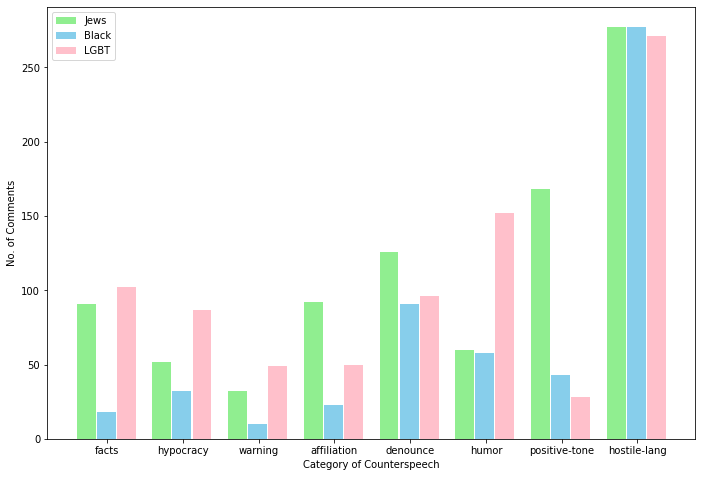

In [20]:
# defining structure of bar graph
X = np.arange(8)
fig = mplot.figure()
ax = fig.add_axes([0,0,1.5,1.5])

# retreiving data
jewsData = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blackData = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lgbtData = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range (len(rawData_jews)):
    if (rawData.iloc[i]['Community'] == 'jews'):
        jewsData[int(rawData.iloc[i]['Category'])] += 1

    if (rawData.iloc[i]['Community'] == 'black'):
        blackData[int(rawData.iloc[i]['Category'])] += 1

    if (rawData.iloc[i]['Community'] == 'lgbt'):
        lgbtData[int(rawData.iloc[i]['Category'])] += 1

jewsData.pop(6)
blackData.pop(6)
lgbtData.pop(6)

jewsData.pop(0)
blackData.pop(0)
lgbtData.pop(0)

# plotting graph
ax.bar(X + 0.00, jewsData, color = 'lightgreen', width = 0.25)             # plotting jewsData
ax.bar(X + 0.265, blackData, color = 'skyblue', width = 0.25)               # plotting blackData
ax.bar(X + 0.53, lgbtData, color = 'pink', width = 0.25)                   # plotting lgbtData

# # x ticklabels
labels = ('facts', 'hypocracy', 'warning', 'affiliation', 'denounce', 'humor', 'positive-tone', 'hostile-lang')

# labelling graph
#ax.set_title("Community wise distribution of Counterspeech")
ax.set_xlabel("Category of Counterspeech")
ax.set_ylabel("No. of Comments")
ax.set_xticks(X + 0.28)
ax.set_xticklabels(labels)
ax.legend(labels = ['Jews', 'Black', 'LGBT'])

mplot.show()
# mplot.savefig('Community_wise_distribution_of_Counterspeech.pdf')

The above graph tell us that mostly **the hate speech is countered by use of Hostile Languages (Category=9) among all the communities**.

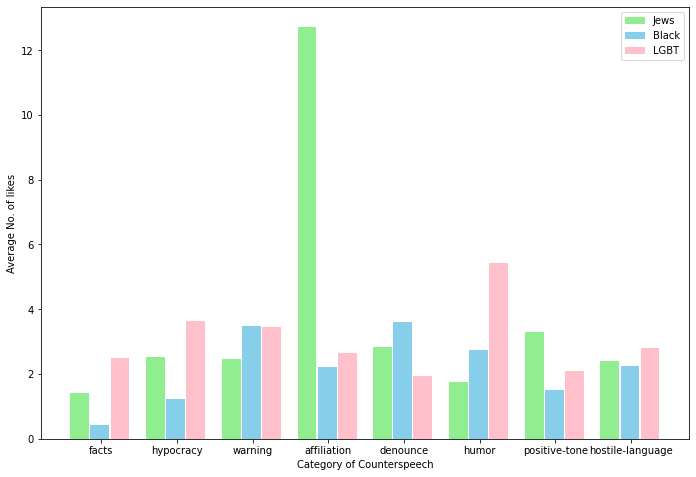

In [21]:
# defining structure of bar graph
X = np.arange(8)
fig = mplot.figure()
ax = fig.add_axes([0,0,1.5,1.5])

# retreiving data
Avg_jews=rawData_jews.groupby('Category').mean()
Avg_jews=Avg_jews.drop(Avg_jews.index[[0,2]])

Avg_black=rawData_black.groupby('Category').mean()
Avg_black=Avg_black.drop(Avg_black.index[[0,2]])

Avg_lgbt=rawData_lgbt.groupby('Category').mean()
Avg_lgbt=Avg_lgbt.drop(Avg_lgbt.index[[0,2]])

jewsData = list(Avg_jews.likes)
blackData = list(Avg_black.likes)
lgbtData = list(Avg_lgbt.likes)

# plotting graph
ax.bar(X + 0.00, jewsData, color = 'lightgreen', width = 0.25)             # plotting jewsData
ax.bar(X + 0.265, blackData, color = 'skyblue', width = 0.25)               # plotting blackData
ax.bar(X + 0.53, lgbtData, color = 'pink', width = 0.25)                   # plotting lgbtData

# x ticklabels
labels = ('facts', 'hypocracy', 'warning', 'affiliation', 'denounce', 'humor', 'positive-tone', 'hostile-language')

# labelling graph
#ax.set_title("Community wise average likes distribution on Counterspeech")
ax.set_xlabel("Category of Counterspeech")
ax.set_ylabel("Average No. of likes")
ax.set_xticks(X + 0.28)
ax.set_xticklabels(labels)
ax.legend(labels = ['Jews', 'Black', 'LGBT'])

mplot.show()

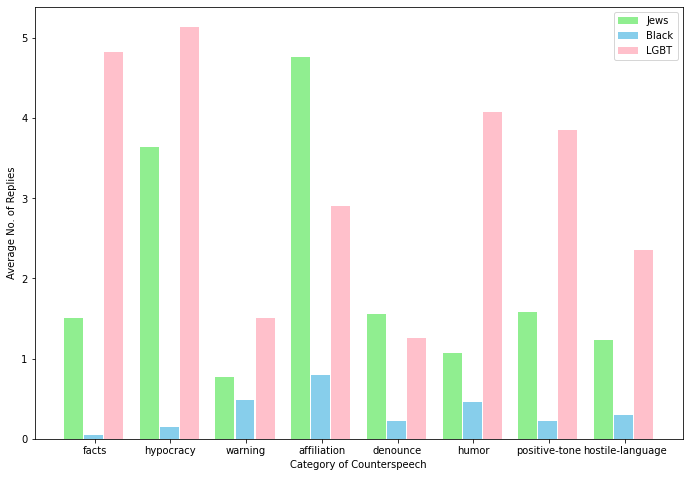

In [22]:
# defining structure of bar graph
X = np.arange(8)
fig = mplot.figure()
ax = fig.add_axes([0,0,1.5,1.5])

# retreiving data
Avg_jews=rawData_jews.groupby('Category').mean()
Avg_jews=Avg_jews.drop(Avg_jews.index[[0,2]])

Avg_black=rawData_black.groupby('Category').mean()
Avg_black=Avg_black.drop(Avg_black.index[[0,2]])

Avg_lgbt=rawData_lgbt.groupby('Category').mean()
Avg_lgbt=Avg_lgbt.drop(Avg_lgbt.index[[0,2]])

jewsData = list(Avg_jews.numberOfReplies)
blackData = list(Avg_black.numberOfReplies)
lgbtData = list(Avg_lgbt.numberOfReplies)

# plotting graph
ax.bar(X + 0.00, jewsData, color = 'lightgreen', width = 0.25)             # plotting jewsData
ax.bar(X + 0.265, blackData, color = 'skyblue', width = 0.25)               # plotting blackData
ax.bar(X + 0.53, lgbtData, color = 'pink', width = 0.25)                   # plotting lgbtData

# x ticklabels
labels = ('facts', 'hypocracy', 'warning', 'affiliation', 'denounce', 'humor', 'positive-tone', 'hostile-language')

# labelling graph
#ax.set_title("Community wise average likes distribution on Counterspeech")
ax.set_xlabel("Category of Counterspeech")
ax.set_ylabel("Average No. of Replies")
ax.set_xticks(X + 0.28)
ax.set_xticklabels(labels)
ax.legend(labels = ['Jews', 'Black', 'LGBT'])

mplot.show()

          CounterSpeech  hasReplies      likes  numberOfReplies
Category                                                       
1                  True    0.181818   1.399351         1.506494
2                  True    0.265957   2.517730         3.638298
3                  True    0.214286   2.455357         0.767857
4                  True    0.315534  12.703883         4.766990
5                  True    0.196809   2.835106         1.553191
7                  True    0.180617   1.744493         1.074890
8                  True    0.178273   3.309192         1.579387
9                  True    0.157303   2.412921         1.226124


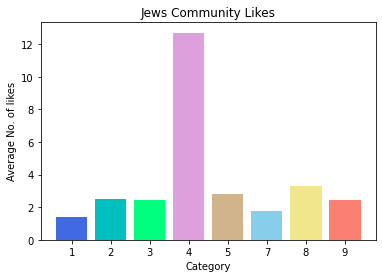

In [ ]:
# retreiving data
Avg_jews=rawData_jews.groupby('Category').mean()
Avg_jews=Avg_jews.drop(Avg_jews.index[[0,2]])
print(Avg_jews)

# plotting jewsData
category=['1','2','3','4','5','7','8','9']
c=['royalblue','c','springgreen','plum','tan',"skyblue","khaki","salmon"]
mplot.bar(category,Avg_jews.likes,color=c)

# labelling graph
mplot.title("Jews Community Likes")
mplot.xlabel("Category")
mplot.ylabel("Average No. of likes")

mplot.show()

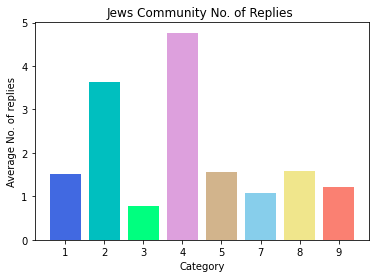

In [ ]:
# plotting jewsData
mplot.bar(category,Avg_jews.numberOfReplies,color=c)

# labelling graph
mplot.title("Jews Community No. of Replies ")
mplot.xlabel("Category")
mplot.ylabel("Average No. of replies")

mplot.show()

The CounterSpeech of **Affiliation type (category 4) is mostly liked by Jews**.

          CounterSpeech  hasReplies     likes  numberOfReplies
Category                                                      
1                  True    0.023529  0.423529         0.047059
2                  True    0.052174  1.234783         0.143478
3                  True    0.098321  3.496403         0.479616
4                  True    0.113208  2.226415         0.798742
5                  True    0.058091  3.614108         0.219917
7                  True    0.074510  2.729412         0.458824
8                  True    0.092827  1.506329         0.219409
9                  True    0.109937  2.262156         0.301268


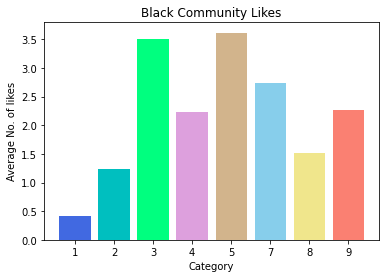

In [ ]:
# retreiving data
Avg_black=rawData_black.groupby('Category').mean()
Avg_black=Avg_black.drop(Avg_black.index[[0,2]])
print(Avg_black)


# plotting blackData
mplot.bar(category,Avg_black.likes,color=c)

# labelling graph
mplot.title("Black Community Likes")
mplot.xlabel("Category")
mplot.ylabel("Average No. of likes")

mplot.show()

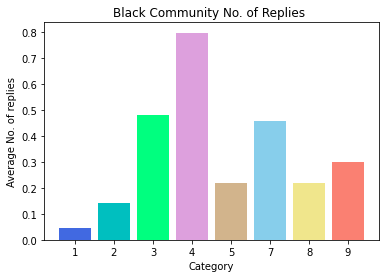

In [ ]:
# plotting blackData
mplot.bar(category,Avg_black.numberOfReplies,color=c)

# labelling graph
mplot.title("Black Community No. of Replies ")
mplot.xlabel("Category")
mplot.ylabel("Average No. of replies")

mplot.show()

Black people usually like Category 3 and 5 which are - **warning of online/offline consequences, and the one Denouncing hateful or dangerous speech**. They reply mostly when the counterspeech is of **Affiliation** type.

          CounterSpeech  hasReplies     likes  numberOfReplies
Category                                                      
1                  True    0.213873  2.490251         4.829480
2                  True    0.211132  3.627376         5.130518
3                  True    0.151515  3.457286         1.510101
4                  True    0.211055  2.650000         2.899497
5                  True    0.185106  1.947146         1.261702
7                  True    0.170492  5.415858         4.077049
8                  True    0.208955  2.100746         3.847015
9                  True    0.150139  2.807941         2.349398


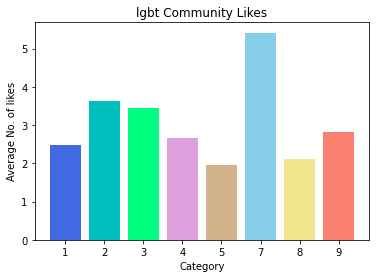

In [ ]:
# retreiving data
Avg_lgbt=rawData_lgbt.groupby('Category').mean()
Avg_lgbt=Avg_lgbt.drop(Avg_lgbt.index[[0,2]])
print(Avg_lgbt)

# plotting lgbtData
mplot.bar(category,Avg_lgbt.likes,color=c)

# labelling graph
mplot.title("lgbt Community Likes")
mplot.xlabel("Category")
mplot.ylabel("Average No. of likes")

mplot.show()

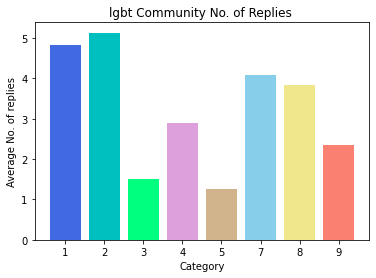

In [ ]:
# plotting lgbtData
mplot.bar(category,Avg_lgbt.numberOfReplies,color=c)

# labelling graph
mplot.title("lgbt Community No. of Replies ")
mplot.xlabel("Category")
mplot.ylabel("Average No. of replies")

mplot.show()

The CounterSpeech of **Humor type (category 7) is mostly liked by LGBT**. and they reply mostly on **Contradiction type (category 2).**

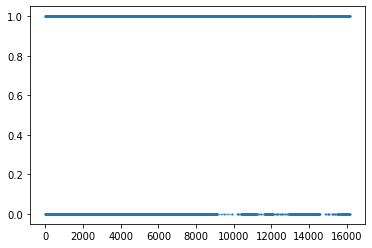

In [ ]:
rows = len(rawData.index)

#Scatter Plot to know counterSpeech
rawData.loc[rawData['CounterSpeech']==False,['CounterSpeech']]=0
rawData.loc[rawData['CounterSpeech']==True,['CounterSpeech']]=1

x = range(rows)
y = rawData['CounterSpeech']
area = 1

mplot.scatter(x, y, s=area, alpha=0.5)
mplot.show()

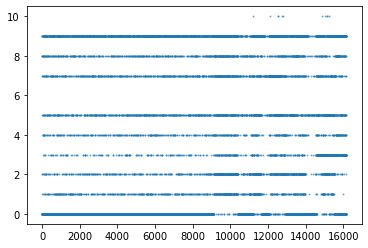

In [ ]:
#Scatter Plot to know counterSpeechType
x = range(rows)
y = rawData['Category']
area = 1

mplot.scatter(x, y, s=area, alpha=0.5)
mplot.show()

**The Machine Learning task which has to be done is Classification which is Supervised learning.**

**So, before Classification we need to preprocess all the data by eliminating URLs, numerals, and punctuations. We need to make all the letter of CommentText lower cased, tokenised and used as input for classification pipeline.**

In [ ]:
#Removing URLs
import regex as re

for i in range(rows):
  rawData.iloc[i,2] = re.sub(r'^http*:\/\/.*[\r\n]*', '', str(rawData.iloc[i,2]), flags=re.MULTILINE)

In [ ]:
#Removing numerals and punctuations and converting it to lower text

puncNum = '''0123456789!()-[]{};:'"\,<>./?@#$%^&*_~'''

for i in range(len(rawData)):
  comment = str(rawData.iloc[i, 2])

  for ch in comment:
    if ch in puncNum:  
        comment = comment.replace(ch, "")

  rawData.iloc[i, 2] = comment.lower()
  rawData.iloc[i, 2] = re.sub(' +', ' ', rawData.iloc[i, 2])

In [ ]:
#removing stopwords
import nltk

nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


for i in range(len(rawData)):
  text=str(rawData.iloc[i,2])
  text_tokens = word_tokenize(text)
  tokens_without_sw = []
  for word in text_tokens:
    if not word in stopwords.words():
      tokens_without_sw.append(word)
  #word for word in text_tokens if not word in stopwords.words()
  new_text = (" ").join(tokens_without_sw)
  rawData.iloc[i,2]=new_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# head of preprocessed data
rawData.head()

,Category,CounterSpeech,commentText,date,hasReplies,id,likes,numberOfReplies,timestamp,user,Community,replies
0,0,0,last brave white women brain,5 years ago,0.0,Ugw-_mfnTo9SUniGGTN4AaABAg,0,0.0,2012-12-05 09:13:58.535,Ik hou van surfen,jews,[]
1,0,0,amen pastor,2 years ago,0.0,UgiMOgO3u4akkngCoAEC,0,0.0,2015-12-05 04:47:36.420,julius smith,lgbt,[]
2,2,1,kind god hates people curses kind people belie...,4 years ago,0.0,UgzemCMbg-ri1ri7sCt4AaABAg,0,0.0,2013-12-05 09:16:05.293,gary wersley,jews,[]
3,8,1,kind god hates people curses kind people belie...,4 years ago,0.0,UgzemCMbg-ri1ri7sCt4AaABAg,0,0.0,2013-12-05 09:16:05.293,gary wersley,jews,[]
4,8,1,question comment racist jews smartest group pe...,3 years ago,0.0,UghFhzrURF1svHgCoAEC,0,0.0,2015-01-05 16:27:25.589,Les Ordway,jews,[]
